In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Training Algorithm - LogisticRegression

### Load data

In [13]:
df = pd.read_csv("C:/Users/Owner/Documents/Preparing Diabetes Data For Training And Testing/pima-data.csv")

### Spilting the data into  Training and Test data sets

70% for training and 30% for testing

In [4]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred',
                     'age',]
predicted_class_names = ['diabetes']

X = df[feature_col_names].values  # predictor feature columns(8 X m)
y = df[predicted_class_names].values  # predicted class [1=true, 0=false] (1 X m)

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state =42)
                                   # test_size = 0.3 is 30%, 42,a constant,is answer to everything 
                                   #this assures that results of split function remains same
#X_train and X_test  -->  features columns
#y_train and y_test  -->  diabetes results
#y result is a function of X features

### Predict Training Data

In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7, random_state = 42) # C is a hyper parameter
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [6]:
lr_predict_train = lr_model.predict(X_train)

# import the performance matrics library
from sklearn import metrics

print("Accuracy : {0:0.4f}%".format(metrics.accuracy_score(y_train,lr_predict_train)))
print()

Accuracy : 0.7784%



#### Predict Test Data

In [7]:
#Predict values using test data

lr_predict_test = lr_model.predict(X_test)

print("Accuracy : {0:0.4f}%".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()

# big drop from trainig data!!!

Accuracy : 0.7619%



#### Metrics

In [8]:
print("Test Metrics")

print("Confusion Metrix")

# Note the use of lables for set 1= True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_predict_test, labels=[1,0])))

# here also recall and precision both are low. 

Test Metrics
Confusion Metrix
[[ 48  32]
 [ 23 128]]
Classification Report
             precision    recall  f1-score   support

          1       0.68      0.60      0.64        80
          0       0.80      0.85      0.82       151

avg / total       0.76      0.76      0.76       231



Setting regularization parameter

ist max values of 0.625 occured at C=1.100


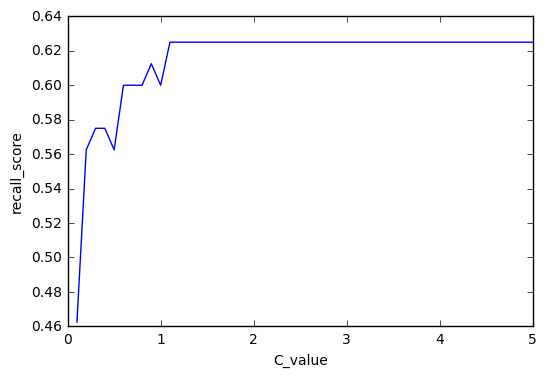

In [9]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values , recall_scores = [], []
 
C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
  
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("ist max values of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

%matplotlib inline
plt.plot(C_values,recall_scores,"-")
plt.xlabel("C_value")
plt.ylabel("recall_score")

# we are still not getting recall over 70%!!!!

# This low recall value may be due to imbalance in data. 
# There are more non-diabetes then diabetes results in data.
# 65% No Diabetes, 35% diabetes. Can becausing baises estimation giving poor prediction results.

### Logistic Regression with class_weight='balanced'

ist max values of 0.800 occured at C=0.200


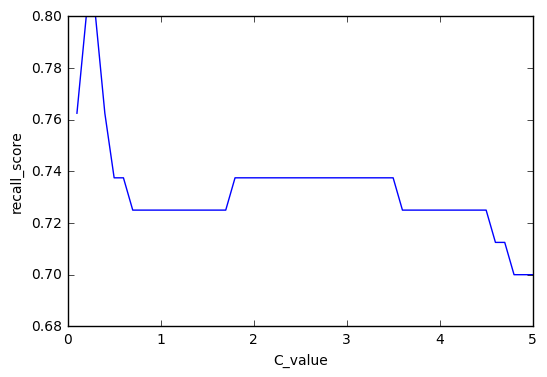

In [10]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values , recall_scores = [], []
 
C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight = 'balanced', random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
  
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("ist max values of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

%matplotlib inline
plt.plot(C_values,recall_scores,"-")
plt.xlabel("C_value")
plt.ylabel("recall_score")

In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = best_score_C_val, class_weight = 'balanced', random_state = 42) 
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [12]:
lr_predict_test = lr_model.predict(X_test)

print("Confusion Metrix")

# Note the use of lables for set 1= True to upper left and 0=False to lower right

print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1,0])))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_predict_test, labels=[1,0])))

# With this change we are able to achieve greater accuracy and recall rate better then 70%.

Confusion Metrix
[[ 64  16]
 [ 45 106]]
Classification Report
             precision    recall  f1-score   support

          1       0.59      0.80      0.68        80
          0       0.87      0.70      0.78       151

avg / total       0.77      0.74      0.74       231

